# Decision Tree Regressor(DTR)

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

# Conditions : decision nodes
# Result :end nodes
The branches/edges represent the truth/falsity of the statement and take makes a decision based on that in the example below which shows a decision tree that evaluates the smallest of three numbers:  




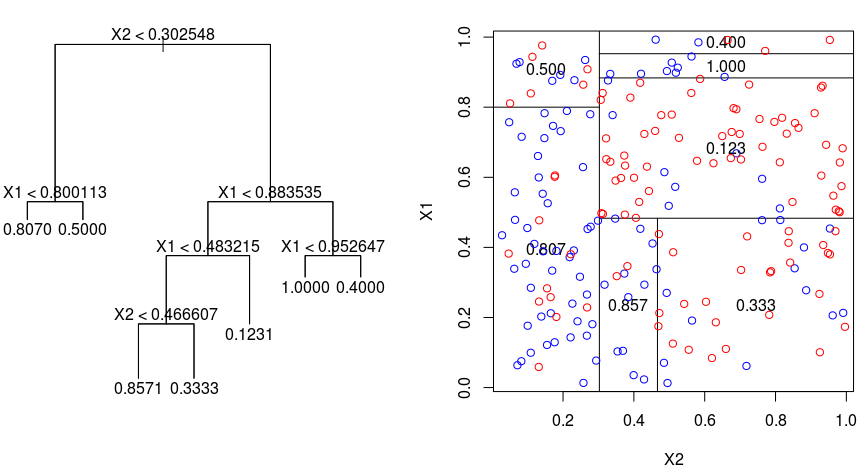

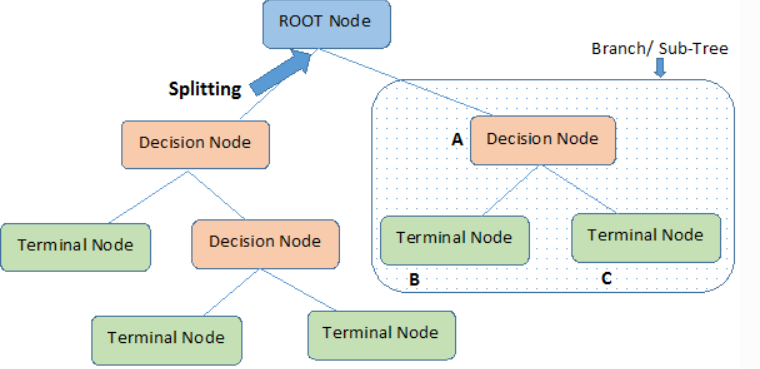

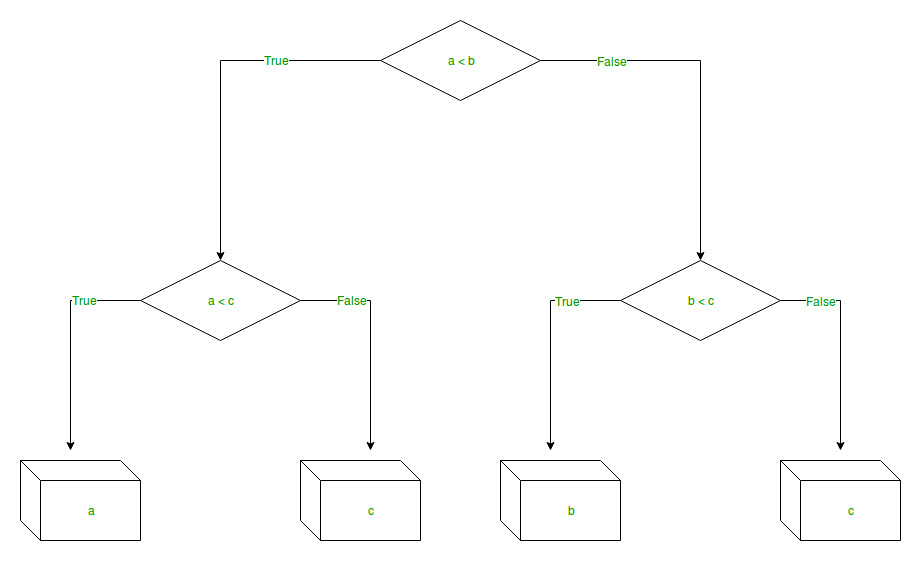

# code

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [14]:
data = fetch_california_housing (as_frame=True)
data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [15]:
df=pd.DataFrame(data.data)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [19]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [31]:
features = data['data']
labels = data['target']
features, labels

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

In [21]:
features.shape, labels.shape

((20640, 8), (20640,))

In [30]:
data.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [23]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
fi  = ['AveRooms','AveBedrms','AveOccup','Population']
df[fi].describe()                     

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [40]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3)

Wall time: 16.8 ms


In [36]:
X_train, X_test, Y_train, Y_test

(        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 17945   4.7604      36.0  5.194444   0.882716       740.0  2.283951     37.33   
 17123   2.5294      37.0  4.879257   1.034056      1385.0  4.287926     37.46   
 2760    2.0625       6.0  4.720539   0.978114      2807.0  4.725589     32.67   
 57      0.8172      52.0  6.102459   1.372951       728.0  2.983607     37.82   
 17999   5.0385      27.0  5.541096   0.920091      1301.0  2.970320     37.28   
 ...        ...       ...       ...        ...         ...       ...       ...   
 6236    4.4102      34.0  6.098630   1.043836      1464.0  4.010959     34.06   
 2110    2.5111      49.0  4.886792   0.964361      1290.0  2.704403     36.75   
 11926   4.0833      49.0  5.603104   1.022173      1344.0  2.980044     33.96   
 3468    3.0000      31.0  4.584034   1.075630       892.0  3.747899     34.31   
 16908  12.4291      34.0  9.666667   1.121864       810.0  2.903226     37.58   
 
        Longit

In [41]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [44]:
y_pred = dtr.predict(X_test)
y_pred

array([2.13 , 2.434, 0.925, ..., 1.19 , 1.378, 0.84 ])

# mean sqauare error

In [83]:
mean_squared_error(y_pred, Y_test)

0.5352924865607396

# mean absolute error

In [84]:
mean_absolute_error(y_pred, Y_test)

0.4716349176356589

# mean_absolute_percentage_error

In [85]:
mean_absolute_percentage_error(y_pred,Y_test)

0.25273423622538843

# data visualization using matplotlib

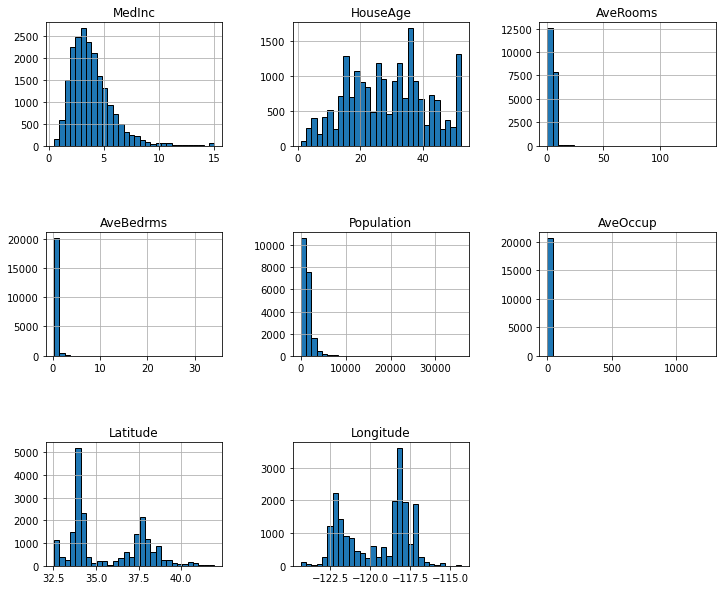

In [86]:
import matplotlib.pyplot as plt
import seaborn as sb

df.hist  (figsize=(12,10), bins=30, edgecolor='black')
plt.subplots_adjust (hspace=0.7, wspace=0.4)